In [1]:
"""
Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Потроить график Precision - Recall на этих же данных
"""

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

data = pd.read_csv('adult.csv')

In [2]:
# обнуляем ячейки с отсутствием данных
data = data[ pd.isnull( data ) == 0 ]

In [3]:
# исследуем модель зависимости уровня дохода от пола человека, типа занятости и образования
model = LogisticRegression(max_iter=1100)  # увеличили количество итераций, чтобы получить сходимость решения 
                                            # (по умолчанию 100 - этого оказывается недостаточно)
le = LabelEncoder() 
select_features = data[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']] 

# Способы выбрать столбцы, кроме целевого:
features_columns = [i for i in data.columns if i != 'income']           #without_income = data.columns[:-1] - срез не работает

X = pd.get_dummies(select_features)   
income = data['income'].ravel()                                                      

y = pd.Series( data = le.fit_transform( income, ) )                    

# разделим данные на 2 выборки: для обучения (80 процентов) и тестирования обученной модели (20 процентов):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model.fit(X_train, y_train)        
y_pred = model.predict_proba(X_test)

In [5]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred[:, 1])
# for line in zip(fpr, tpr, thresholds):
#     print(line)

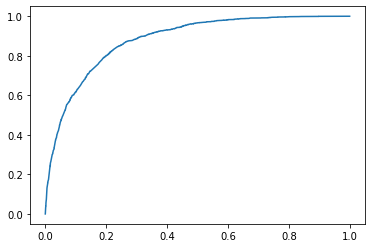

0.8807994261661911
Площадь, рассчитанная штатными инструментами:  0.8807994261661911


In [6]:
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
plt.plot(fpr, tpr)  
plt.show()      
print(roc_auc_score(y_test, y_pred[:, 1]))
print('Площадь, рассчитанная штатными инструментами: ', metrics.auc(fpr, tpr))


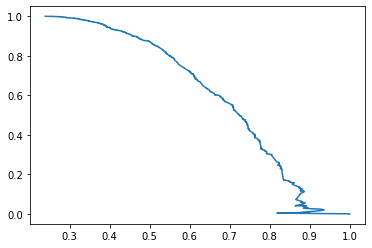

In [8]:
# Потроим график Precision - Recall на этих же данных
# Подробнее о графиках: 
# https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py
precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:, 1])
plt.plot(precision, recall)  
plt.show()

In [7]:
# Рассчитаем вручную:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative
y_pred = model.predict_proba( X_test )
for predicted_prob, actual in zip( y_pred[:, 1], y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
# print('Площадь, рассчитанная ручным способом: ', str(metrics.auc(fpr, tpr)))
